In [3]:
import pandas as pd

# Load the data
df = pd.read_csv('polluting.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display data types and check for missing values
print(df.info())



   Year  Overall  Overall Lower Limit  Overall Upper Limit
0  1990     88.8                 77.4                 96.2
1  1991     87.8                 76.2                 95.7
2  1992     86.8                 75.1                 95.0
3  1993     85.9                 73.4                 94.4
4  1994     84.8                 72.0                 93.8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 32 non-null     int64  
 1   Overall              32 non-null     float64
 2   Overall Lower Limit  32 non-null     float64
 3   Overall Upper Limit  32 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.1 KB
None


In [5]:
# Convert 'year' to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Check for missing values and drop them if necessary
df = df.dropna()


In [6]:
# Set the year as the index
df.set_index('Year', inplace=True)


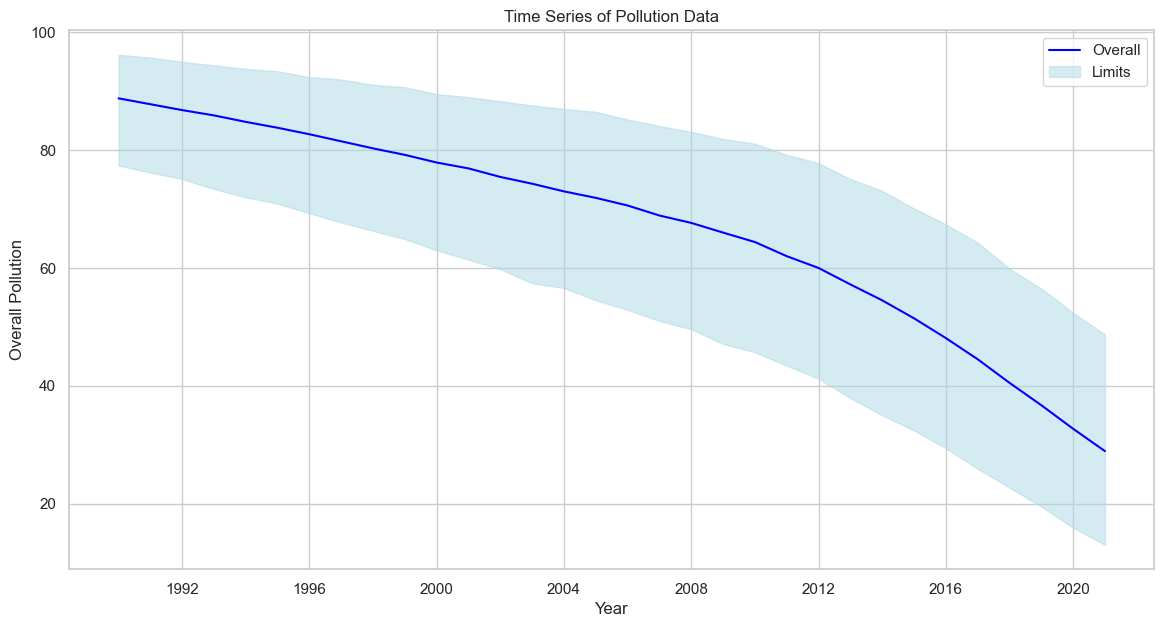

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting the time series
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Overall'], label='Overall', color='blue')
plt.fill_between(df.index, df['Overall Lower Limit'], df['Overall Upper Limit'], color='lightblue', alpha=0.5, label='Limits')
plt.title('Time Series of Pollution Data')
plt.xlabel('Year')
plt.ylabel('Overall Pollution')
plt.legend()
plt.show()


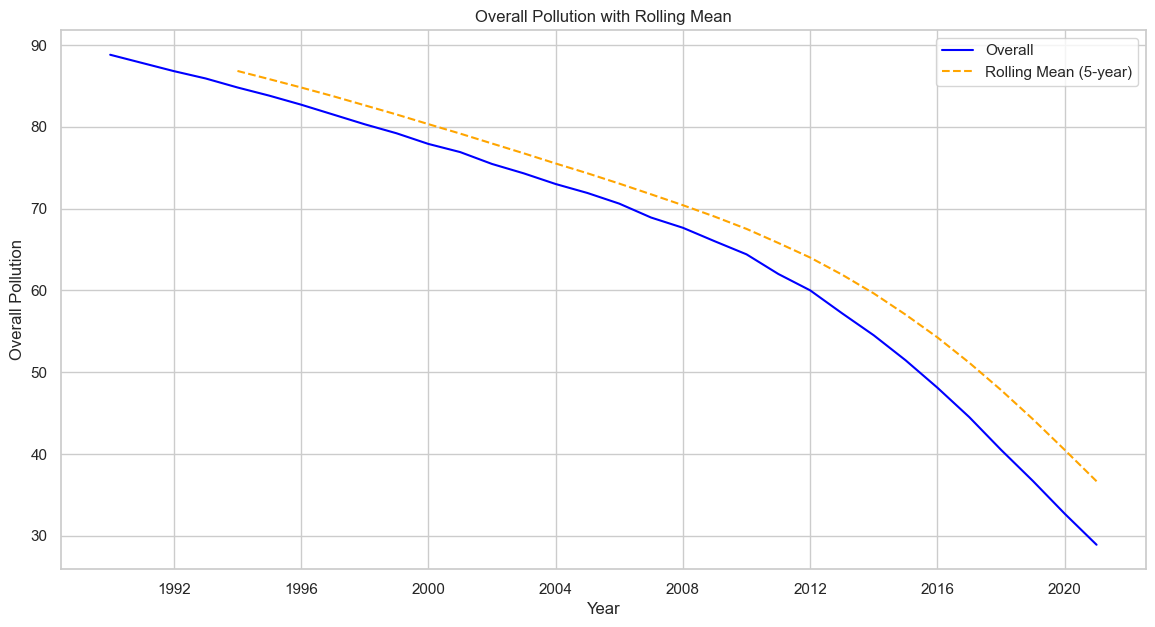

In [9]:
# Calculate the rolling average
df['rolling_mean'] = df['Overall'].rolling(window=5).mean()

# Plot the rolling mean
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Overall'], label='Overall', color='blue')
plt.plot(df.index, df['rolling_mean'], label='Rolling Mean (5-year)', color='orange', linestyle='--')
plt.title('Overall Pollution with Rolling Mean')
plt.xlabel('Year')
plt.ylabel('Overall Pollution')
plt.legend()
plt.show()


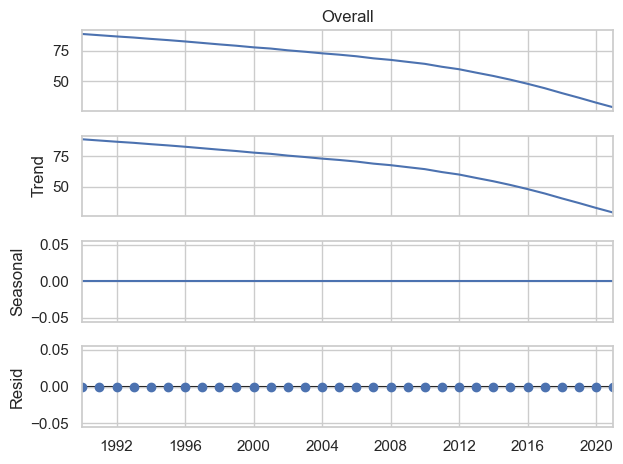

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['Overall'], model='additive')
decomposition.plot()
plt.show()


In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model (choose order (p, d, q) based on ACF and PACF plots)
model = ARIMA(df['Overall'], order=(1, 1, 1))
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

# Forecasting the next 5 years
forecast = model_fit.forecast(steps=5)
print(forecast)


                               SARIMAX Results                                
Dep. Variable:                Overall   No. Observations:                   32
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  -9.476
Date:                Thu, 26 Sep 2024   AIC                             24.953
Time:                        06:55:15   BIC                             29.255
Sample:                    01-01-1990   HQIC                            26.355
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9962      0.009    106.752      0.000       0.978       1.015
ma.L1         -0.2230      0.225     -0.993      0.321      -0.663       0.217
sigma2         0.0935      0.022      4.229      0.0

In [12]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(df['Overall'])

# Extract and display the results
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
num_obs = result[3]
critical_values = result[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Used Lag:', used_lag)
print('Number of Observations:', num_obs)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')


ADF Statistic: 4.438964977418955
p-value: 1.0
Used Lag: 10
Number of Observations: 21
Critical Values:
   1%: -3.7883858816542486
   5%: -3.013097747543462
   10%: -2.6463967573696143
